In [2]:
# Import libraries.

In [26]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [27]:
# Prepare Data

In [28]:
## Use Pandas to read in each of the CSV files as a DataFrame. Be sure to convert the dates to a DateTimeIndex.

In [29]:
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [30]:
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [31]:
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [32]:
## Detect and remove null values.

In [33]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [34]:
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [35]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [36]:
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [37]:
## Remove dollar signs from the numeric values and convert the data types as needed.
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [38]:
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')
sp500_history.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [39]:
sp500_history.dtypes

Close    object
dtype: object

In [40]:
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history.dtypes
sp500_history['Close'] = sp500_history['Close'].pct_change()
sp500_history.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [41]:
## Detect and remove null values for S&P 500 Historic Prices.

In [42]:
sp500_history.isnull().sum()

Close    1
dtype: int64

In [43]:
sp500_history.dropna(inplace=True)
sp500_history.isnull().sum()

Close    0
dtype: int64

In [44]:
## The whale portfolios and algorithmic portfolio CSV files contain daily returns, but the S&P 500 CSV file contains closing prices. Convert the S&P 500 closing prices to daily returns.
sp500_history = sp500_history.rename(columns={
    "Close": "S & P 500"
})
sp500_history.head()

,S & P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [45]:
## Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_returns = pd.concat([whale_returns, algo_returns, sp500_history], axis="columns", join="inner")
joined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S & P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [46]:
# Conduct Quantitative Analysis

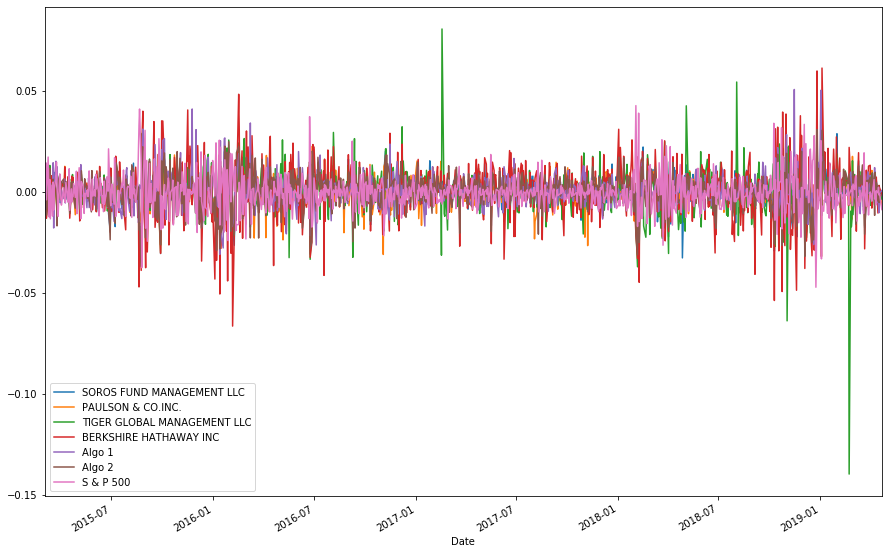

In [50]:
## Performance Analysis
### Calculate and plot cumulative returns. Does any portfolio outperform the S&P 500?
joined_returns.plot(figsize=(15,10))

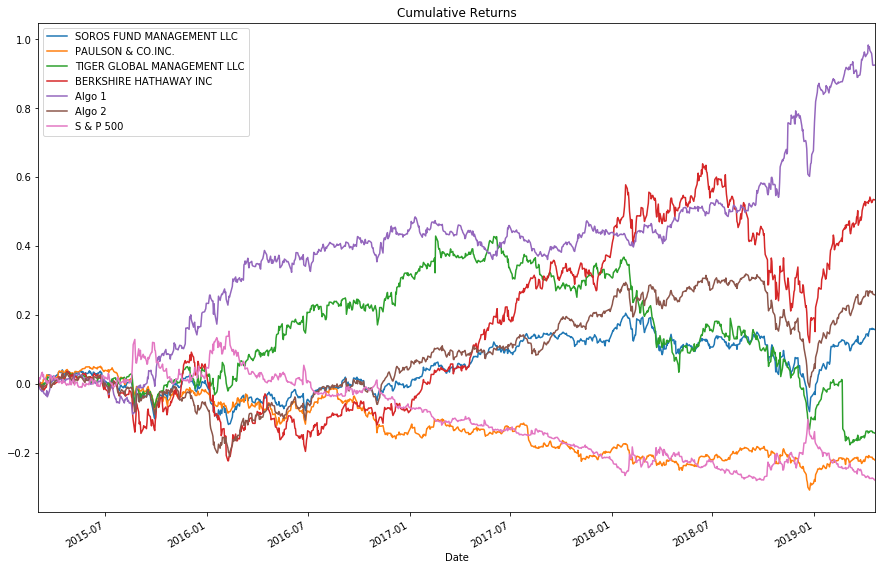

In [62]:
cumlative_returns = (1 + joined_returns).cumprod() -1
cumlative_returns.plot(figsize=(15,10), title='Cumulative Returns')

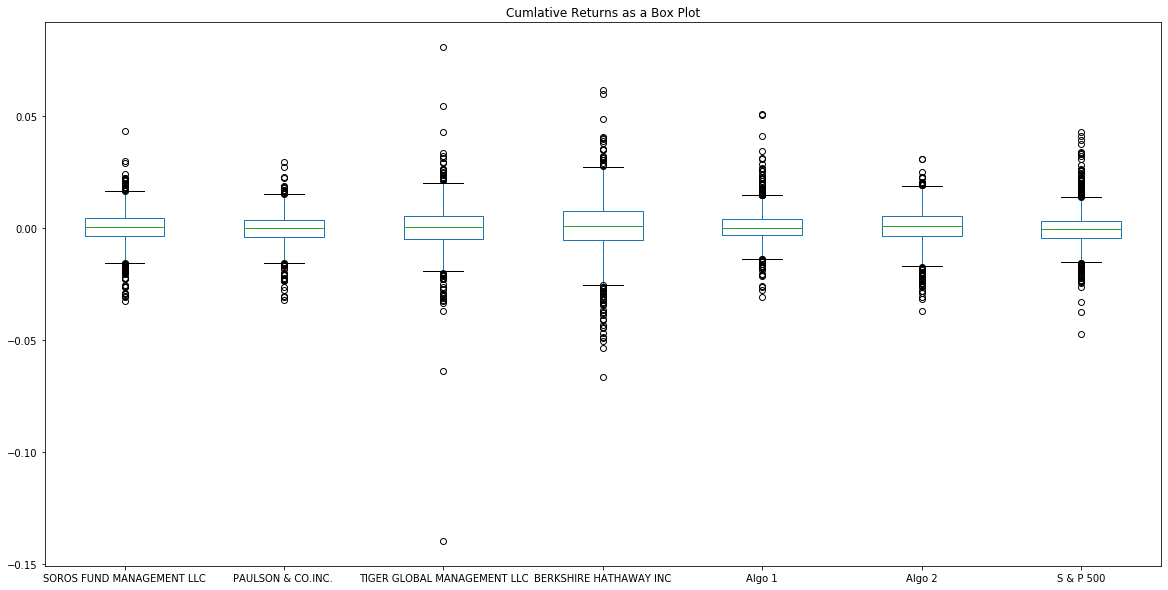

In [63]:
## Risk Analysis
### Create a box plot for each of the returns. Which box has the largest spread? Which has the smallest spread?
joined_returns.plot.box(figsize=(20,10), title='Cumlative Returns as a Box Plot')

In [64]:
###Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
daily_std = joined_returns.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S & P 500                      0.008587
dtype: float64


In [65]:
riskier = daily_std[daily_std > daily_std["S & P 500"]]
print(riskier)

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64
